<a href="https://colab.research.google.com/github/msperand/NBA-tests/blob/main/Nba_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [ ]:
pip install nba_api

In [ ]:
from nba_api.stats.endpoints import playercareerstats

# Fetching career statistics for Player of Choice using his player ID
player_career = playercareerstats.PlayerCareerStats(player_id='202681')
player_career_df = player_career.get_data_frames()[0]

# Extracting the seasons of player of choice
seasons_played = player_career_df['SEASON_ID'].unique()
print(seasons_played.tolist())

['2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23', '2023-24']


In [ ]:
from nba_api.stats.static import players
from nba_api.stats.endpoints import playercareerstats
import pandas as pd

# Fetch a list of all active players
active_players = players.get_active_players()

# Initialize an empty list to hold DataFrames for each player
dfs = []

# Loop through the active players, fetch career stats, and append to the list
for player in active_players:
    player_career = playercareerstats.PlayerCareerStats(player_id=player['id'])
    player_career_df = player_career.get_data_frames()[0]
    # Optionally, add a column for the player's name for easier identification
    player_career_df['PLAYER_NAME'] = player['full_name']
    dfs.append(player_career_df)

# Concatenate all the player DataFrames into a single DataFrame
all_players_career_stats = pd.concat(dfs, ignore_index=True)

# Display the DataFrame
print(all_players_career_stats.head())


  PLAYER_ID SEASON_ID LEAGUE_ID     TEAM_ID TEAM_ABBREVIATION  PLAYER_AGE  GP  \
0   1630173   2020-21        00  1610612748               MIA        21.0  61   
1   1630173   2021-22        00  1610612761               TOR        22.0  73   
2   1630173   2022-23        00  1610612761               TOR        23.0  55   
3   1630173   2023-24        00  1610612761               TOR        24.0  25   
4   1630173   2023-24        00  1610612752               NYK        24.0  27   

   GS     MIN  FGM  ... OREB  DREB  REB AST  STL BLK TOV   PF  PTS  \
0   4   737.0  124  ...   73   135  208  29   20  28  43   91  304   
1  28  1725.0  265  ...  146   327  473  82   37  41  84  151  664   
2  12  1141.0  196  ...  100   228  328  50   31  30  59  102  508   
3   0   437.0   78  ...   50    86  136  44   16  12  29   40  193   
4  13   729.0   97  ...   89   116  205  27   17  29  27   59  228   

        PLAYER_NAME  
0  Precious Achiuwa  
1  Precious Achiuwa  
2  Precious Achiuwa  
3  P

In [ ]:
all_players_career_stats.shape

(3439, 28)

In [ ]:
# Assuming `df` is your DataFrame
all_players_career_stats.to_csv('active_player_stats.csv', index=False)


In [ ]:
from google.colab import files
files.download('active_player_stats.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
career=pd.DataFrame()

In [33]:
career['points'] = all_players_career_stats.groupby('PLAYER_ID')['PTS'].sum()
career['games'] = all_players_career_stats.groupby('PLAYER_ID')['GP'].sum()
career['games_started'] = all_players_career_stats.groupby('PLAYER_ID')['GS'].sum()
career['minutes'] = all_players_career_stats.groupby('PLAYER_ID')['MIN'].sum()
career['field_goals_made'] = all_players_career_stats.groupby('PLAYER_ID')['FGM'].sum()
career['field_goals_attempted'] = all_players_career_stats.groupby('PLAYER_ID')['FGA'].sum()
career['field_goal_percentage'] = all_players_career_stats.groupby('PLAYER_ID')['FG_PCT'].mean()
career['three_point_made'] = all_players_career_stats.groupby('PLAYER_ID')['FG3M'].sum()
career['three_point_attempted'] = all_players_career_stats.groupby('PLAYER_ID')['FG3A'].sum()
career['three_point_percentage'] = all_players_career_stats.groupby('PLAYER_ID')['FG3_PCT'].mean()
career['free_throws_made'] = all_players_career_stats.groupby('PLAYER_ID')['FTM'].sum()
career['free_throws_attempted'] = all_players_career_stats.groupby('PLAYER_ID')['FTA'].sum()
career['free_throw_percentage'] = all_players_career_stats.groupby('PLAYER_ID')['FT_PCT'].mean()
career['offensive_rebounds'] = all_players_career_stats.groupby('PLAYER_ID')['OREB'].sum()
career['defensive_rebounds'] = all_players_career_stats.groupby('PLAYER_ID')['DREB'].sum()
career['rebounds'] = all_players_career_stats.groupby('PLAYER_ID')['REB'].sum()
career['assists'] = all_players_career_stats.groupby('PLAYER_ID')['AST'].sum()
career['steals'] = all_players_career_stats.groupby('PLAYER_ID')['STL'].sum()
career['blocks'] = all_players_career_stats.groupby('PLAYER_ID')['BLK'].sum()
career['turnovers'] = all_players_career_stats.groupby('PLAYER_ID')['TOV'].sum()
career['personal_fouls'] = all_players_career_stats.groupby('PLAYER_ID')['PF'].sum()


unique_player_names = all_players_career_stats[['PLAYER_ID', 'PLAYER_NAME']].drop_duplicates()
career = pd.merge(career, unique_player_names, on='PLAYER_ID', how='left')

In [34]:
print(career.head())

   PLAYER_ID points games games_started  minutes field_goals_made  \
0       2544  39926  1472          1470  55874.0            14633   
1     101108  22050  1247          1225  42690.0             7799   
2     200768  16955  1235           922  38224.0             5455   
3     200782   6575  1019           716  28558.0             2387   
4     201142  29684  1084          1081  39745.0            10199   

  field_goals_attempted  field_goal_percentage three_point_made  \
0                 28962               0.507429             2370   
1                 16553               0.467842             1688   
2                 12848               0.429864             2231   
3                  5660               0.405053              984   
4                 20277               0.512000             2069   

  three_point_attempted  ...  free_throw_percentage offensive_rebounds  \
0                  6835  ...               0.733048               1711   
1                  4572  ...      

In [ ]:
fig = px.scatter(career, x='', y='CAREER_PPG',
                 hover_name='PLAYER_NAME_x',  # This will show the player's name on hover
                 title='Career MPG vs. Career PPG')

fig.update_traces(marker=dict(size=10),  # You can adjust the marker size here
                  selector=dict(mode='markers'))

fig.update_layout(xaxis_title='Career Minutes Per Game',
                  yaxis_title='Career Points Per Game')

fig.show()

In [ ]:
#testing the data, computing the average ppg of each player and plotting it against the mpg

# Assuming all_players_career_stats is your DataFrame containing career stats for all players

# Calculate total points and total games played for each player
total_points = all_players_career_stats.groupby('PLAYER_ID')['PTS'].sum()
total_games = all_players_career_stats.groupby('PLAYER_ID')['GP'].sum()
total_minutes=all_players_career_stats.groupby('PLAYER_ID')['MIN'].sum()

# Calculate career PPG for each player
career_ppg = total_points / total_games
career_mpg = total_minutes / total_games

# Convert career PPG Series to DataFrame for better readability and to add player names
career_ppg_df = career_ppg.reset_index().rename(columns={0: 'CAREER_PPG'})
career_mpg_df = career_mpg.reset_index().rename(columns={0: 'CAREER_MPG'})

# Add player names to the career_ppg_df DataFrame
# This step requires merging career_ppg_df with a unique list of player IDs and names from the original DataFrame
unique_player_names = all_players_career_stats[['PLAYER_ID', 'PLAYER_NAME']].drop_duplicates()
career_ppg_df = pd.merge(career_ppg_df, unique_player_names, on='PLAYER_ID', how='left')
career_mpg_df = pd.merge(career_mpg_df, unique_player_names, on='PLAYER_ID', how='left')

# Display the DataFrame with player names and their career PPG
print(career_ppg_df.head())
print(career_mpg_df)



  PLAYER_ID CAREER_PPG   PLAYER_NAME
0      2544  27.123641  LeBron James
1    101108  17.682438    Chris Paul
2    200768  13.728745    Kyle Lowry
3    200782   6.452404   P.J. Tucker
4    201142  27.383764  Kevin Durant
    PLAYER_ID CAREER_MPG    PLAYER_NAME
0        2544   37.95788   LeBron James
1      101108  34.234162     Chris Paul
2      200768  30.950607     Kyle Lowry
3      200782  28.025515    P.J. Tucker
4      201142  36.665129   Kevin Durant
..        ...        ...            ...
520   1641816        3.0   Hunter Tyson
521   1641854  14.058824   Craig Porter
522   1641871  17.093023     Duop Reath
523   1641926        7.5  Dexter Dennis
524   1641931        3.0  Onuralp Bitim

[525 rows x 3 columns]


In [ ]:
Test_per_game= pd.merge(career_ppg_df, career_mpg_df , on='PLAYER_ID', how='inner')

In [ ]:
print(Test_per_game)

    PLAYER_ID CAREER_PPG  PLAYER_NAME_x CAREER_MPG  PLAYER_NAME_y
0        2544  27.123641   LeBron James   37.95788   LeBron James
1      101108  17.682438     Chris Paul  34.234162     Chris Paul
2      200768  13.728745     Kyle Lowry  30.950607     Kyle Lowry
3      200782   6.452404    P.J. Tucker  28.025515    P.J. Tucker
4      201142  27.383764   Kevin Durant  36.665129   Kevin Durant
..        ...        ...            ...        ...            ...
520   1641816   0.222222   Hunter Tyson        3.0   Hunter Tyson
521   1641854   6.205882   Craig Porter  14.058824   Craig Porter
522   1641871   8.651163     Duop Reath  17.093023     Duop Reath
523   1641926        5.5  Dexter Dennis        7.5  Dexter Dennis
524   1641931        0.0  Onuralp Bitim        3.0  Onuralp Bitim

[525 rows x 5 columns]


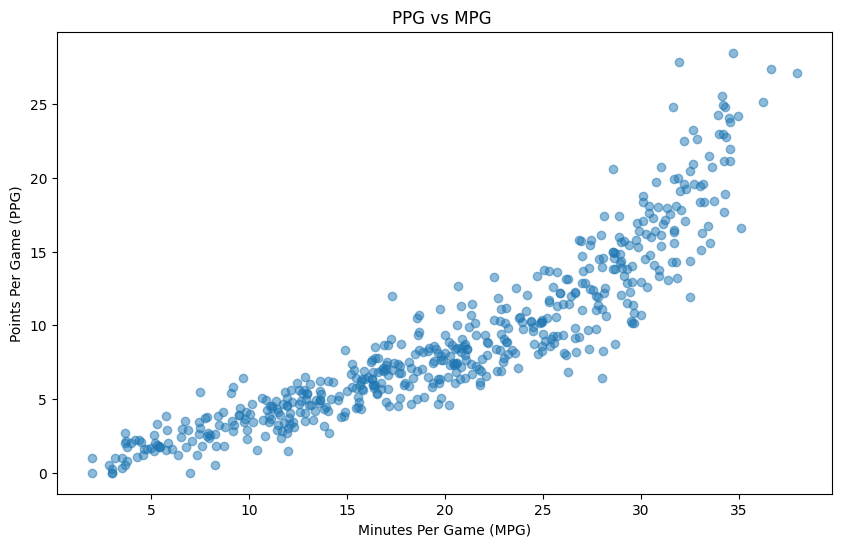

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Test_per_game['CAREER_MPG'], Test_per_game['CAREER_PPG'], alpha=0.5)
plt.xlabel('Minutes Per Game (MPG)')
plt.ylabel('Points Per Game (PPG)')
plt.title('PPG vs MPG ')
plt.show()

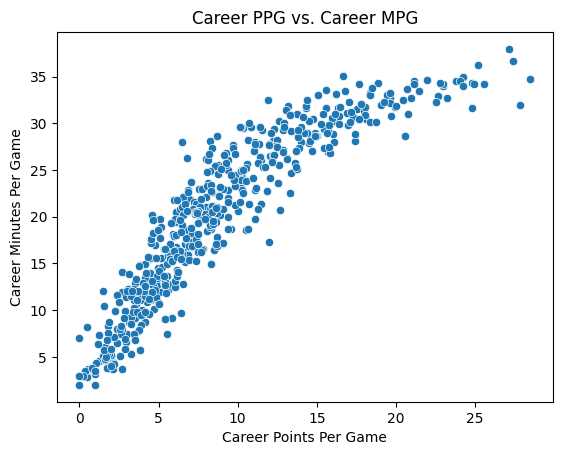

In [ ]:


# Seaborn scatter plot
sns.scatterplot(data=Test_per_game, x='CAREER_PPG', y='CAREER_MPG').set_title('Career PPG vs. Career MPG')

plt.xlabel('Career Points Per Game')  # X-axis label
plt.ylabel('Career Minutes Per Game')  # Y-axis label
plt.show()


In [28]:
# Assuming test_per_game has 'Player_Name', 'CAREER_PPG', and 'CAREER_MPG' columns
fig = px.scatter(Test_per_game, x='CAREER_MPG', y='CAREER_PPG',
                 hover_name='PLAYER_NAME_x',  # This will show the player's name on hover
                 title='Career MPG vs. Career PPG')

fig.update_traces(marker=dict(size=10),  # You can adjust the marker size here
                  selector=dict(mode='markers'))

fig.update_layout(xaxis_title='Career Minutes Per Game',
                  yaxis_title='Career Points Per Game')

fig.show()